In [117]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import numpy as np
import itertools
import random

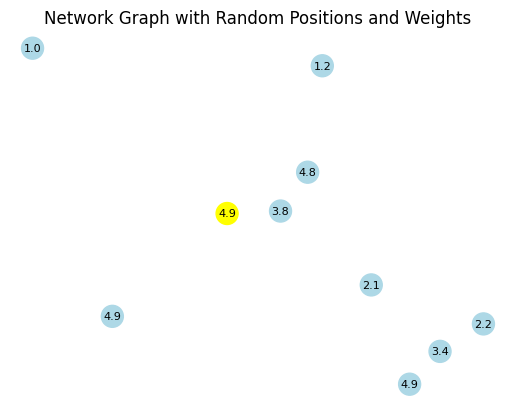

In [118]:
# Parameters
n = 10              # Number of nodes
weight_range = 5    # highest value the weight can go
pos_lim=10          # limit for the position of the nodes

# Generate graph
G = nx.Graph()

# Add nodes with random positions and weights
positions = {node: (np.random.uniform(-pos_lim,pos_lim), np.random.uniform(-pos_lim,pos_lim)) for node in range(n)}
positions[0] = (0, 0)  # depot position

weights = {node: np.random.uniform(1, weight_range) for node in range(n)}
G.add_nodes_from(positions.keys())
nx.set_node_attributes(G, positions, 'pos')
nx.set_node_attributes(G, weights, 'weight')

# Drawing the graph
weights = nx.get_node_attributes(G, 'weight')
weight_labels = {node: round(weight, 1) for node, weight in weights.items()}
node_colors = ['yellow' if node == 0 else 'lightblue' for node in G.nodes()]
nx.draw_networkx(G, positions, with_labels=True, labels = weight_labels, node_color=node_colors, node_size=250, font_size=8)
plt.title('Network Graph with Random Positions and Weights')
plt.axis('off')
plt.show()


Cluster generation

In [131]:
def CC(vi_x, vi_y):
    n = len(vi_x)
    x = np.sum(vi_x)/n
    y = np.sum(vi_y)/n
    return x,y

positions_list = list(positions.values())
distances_list = np.linalg.norm(positions_list, axis=1)

# find the core stop
pos_c = positions[np.argmax(distances_list)]                                 #maximum distance
#pos_c = positions[max(positions, key=lambda node: weights[node])]      #maximum weight

distances_new = np.linalg.norm(np.subtract(list(positions.values()),list(pos_c)), axis=1)


min_new = np.partition(distances_new, 1)[1]
min_new_index = np.where(distances_new == min_new)[0][0]
min_new_position = positions_list[min_new_index]




